1. IMPORTATION DES PACKAGES

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

2. CHARGEMENT DES DONNEES

In [245]:
data=pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


3. ANALYSE DES DONNEES

In [246]:
data.shape

(1338, 7)

In [247]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [249]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [250]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [251]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [252]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

4. TRAITEMENT DES DONNEES

In [253]:
#Label encoding
labeling_IP_dst= LabelEncoder()
data["sex"]= labeling_IP_dst.fit_transform(data["sex"])
data["smoker"]= labeling_IP_dst.fit_transform(data["smoker"])
data["region"]= labeling_IP_dst.fit_transform(data["region"])

In [254]:
data["sex"].unique()

array([0, 1])

In [255]:
data["smoker"].unique()

array([1, 0])

In [256]:
data["region"].unique()

array([3, 2, 1, 0])

In [257]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [259]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


5. MATRICE DE CORRELATION

<Axes: >

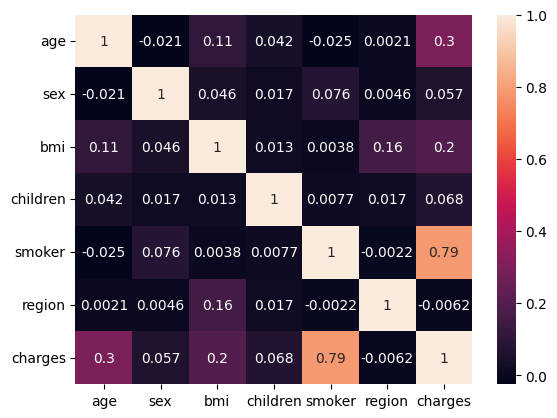

In [260]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

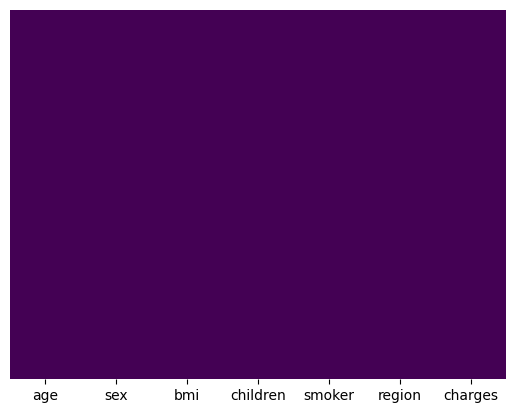

In [261]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

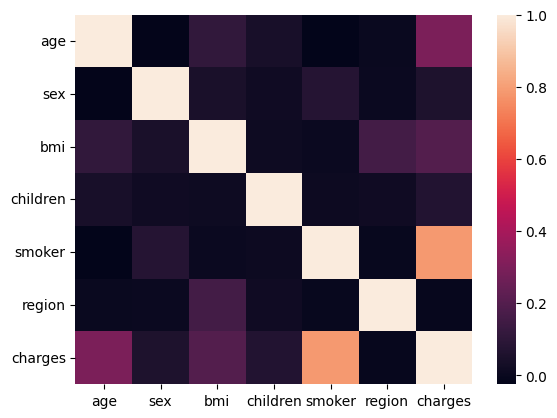

In [262]:
sns.heatmap(data.corr(), annot =False)

In [263]:
data.corr().smoker.sort_values(ascending=False)

smoker      1.000000
charges     0.787251
sex         0.076185
children    0.007673
bmi         0.003750
region     -0.002181
age        -0.025019
Name: smoker, dtype: float64

Filtre

In [264]:
data[data['charges'] > 8]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


6. SEPARATION DES DONNEES (TRAIN&TEST)

In [265]:
#variable independante
X = data.iloc[ : , :-1].values
#Variable dependante
y = data.iloc[ : , -1].values

In [266]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [267]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [269]:
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (1070, 6)
y-train Shape: (1070,)
X-test Shape: (268, 6)
y-test Shape: (268,)


In [270]:
data.shape

(1338, 7)

7. CREATION DU MODELE (RÉGRESSION LINÉAIRE MULTIPLE)

In [271]:
#Création du model
model_lineaire = LinearRegression()

In [272]:
# Entrainement du model
model_lineaire.fit(X_train, y_train)

LinearRegression()

In [273]:
# Faire la prédiction
y_test

array([ 7729.64575 , 63770.42801 , 27346.04207 ,  4719.73655 ,
        5976.8311  , 14043.4767  , 13012.20865 ,  3481.868   ,
        5028.1466  ,  8083.9198  , 34806.4677  , 10577.087   ,
        9411.005   ,  8520.026   , 11830.6072  , 19539.243   ,
       12495.29085 ,  7323.734819, 24513.09126 , 11093.6229  ,
       10065.413   , 17128.42608 ,  7371.772   , 12269.68865 ,
        6389.37785 , 40419.0191  , 35491.64    , 19719.6947  ,
        7441.053   , 38746.3551  , 22493.65964 ,  1824.2854  ,
       32108.66282 ,  9222.4026  , 34472.841   , 10107.2206  ,
       16657.71745 , 10461.9794  , 43921.1837  ,  4239.89265 ,
        9910.35985 ,  7162.0122  ,  4827.90495 ,  3987.926   ,
       27000.98473 , 45008.9555  , 46130.5265  , 16577.7795  ,
       11946.6259  , 34672.1472  , 36397.576   ,  2138.0707  ,
        4889.9995  , 10601.63225 ,  3761.292   ,  1607.5101  ,
        3161.454   , 15555.18875 , 10923.9332  ,  5708.867   ,
       10118.424   , 33732.6867  ,  2261.5688  ,  6652.

In [274]:
y_predicted_lr = model_lineaire.predict(X_test)
y_predicted_lr

array([ 8490.21122861, 40918.62354937, 11416.69106801,  3812.27155459,
        7828.90806606, 14678.5640411 , 11241.76729243,  4161.25041421,
        7123.14645583, 15639.76996204, 28979.03437239,  8751.93912967,
       11612.48788979,  9743.32703148, 10188.50159278, 29615.67864555,
       14874.59341761,  2522.41049338, 11460.28101072, 15728.97606352,
        8179.04548609,  7198.6029637 , 10761.16789429, 13950.01152743,
        7226.23708834, 33572.3706887 , 29856.80937832, 29538.22961076,
        9026.72960075, 32324.80589343,  2571.14474753,  4104.82759463,
       10195.58634428, 10680.78661704, 27913.42056064,  8983.10003805,
       27222.49252937, 12166.58769692, 37212.30881303,  4787.4885394 ,
       11106.99785971, 11371.60520444,  2681.25684369,  5948.5884836 ,
       14195.56195505, 37524.06601127, 38775.73182556, 26500.79218374,
       13348.90656733, 28988.35060416, 28203.04550917,  5123.5194203 ,
        8586.3573523 , 12784.39197761,  4692.34132865, -1008.08263657,
      

In [275]:
mean_squared_error(y_test, y_predicted_lr)

42899332.38517811

In [276]:
r2_score(y_test, y_predicted_lr)

0.7211174878662856

In [277]:
print("Mean Squared Error:", mean_squared_error(y_test, y_predicted_lr))
print("R2 Squared:", r2_score(y_test, y_predicted_lr))

Mean Squared Error: 42899332.38517811
R2 Squared: 0.7211174878662856


In [278]:
data.shape

(1338, 7)

8. Vérification de la prédiction

In [279]:
model_lineaire.coef_

array([  257.03875568,   -56.37573634,   329.99933638,   429.22215892,
       23888.72864714,  -383.3743439 ])

In [280]:
model_lineaire.intercept_

-11728.71775426032

In [281]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


9. FORESTE ALÉATOIRE

In [282]:
model_Random_Forest =RandomForestRegressor()
model_Random_Forest.fit(X_train, y_train)

RandomForestRegressor()

In [283]:
y_predicted_rf = model_Random_Forest.predict(X_test)

10. ARBRE DE DÉCISION

In [284]:
model_decission_tree=DecisionTreeRegressor()
model_decission_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [285]:
y_predicted_dt = model_decission_tree.predict(X_test)

In [286]:
print("Mean Squar Error d arbre de decision:",mean_squared_error(y_test, y_predicted_dt)) 
print("r2_score d arbre de decision:", r2_score(y_test, y_predicted_dt))

Mean Squar Error d arbre de decision: 37264170.574877374
r2_score d arbre de decision: 0.7577508803821937
